In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df['Gender'].replace(['Female','Male'], [0,1], inplace=True)

In [8]:
df['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [9]:
cat_data=df.select_dtypes(include='object')
cat_data

,Geography
0,France
1,Spain
2,France
3,France
4,Spain
...,...
9995,France
9996,France
9997,France
9998,Germany


In [10]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_data)

OneHotEncoder(handle_unknown='ignore')

In [11]:
ohe_features=ohe.get_feature_names_out(input_features=cat_data.columns)
ohe_features

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [12]:
x_train_cat=pd.DataFrame(ohe.transform(cat_data).toarray(), columns=ohe_features)
x_train_cat.head()

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [13]:
num_data=df.select_dtypes(exclude='object')
data=pd.concat([x_train_cat,num_data],axis=1)
data

,Geography_France,Geography_Germany,Geography_Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,0.0,0.0,619,0,42,2,0.00,1,1,1,101348.88,1
1,0.0,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58,0
2,1.0,0.0,0.0,502,0,42,8,159660.80,3,1,0,113931.57,1
3,1.0,0.0,0.0,699,0,39,1,0.00,2,0,0,93826.63,0
4,0.0,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,771,1,39,5,0.00,2,1,0,96270.64,0
9996,1.0,0.0,0.0,516,1,35,10,57369.61,1,1,1,101699.77,0
9997,1.0,0.0,0.0,709,0,36,7,0.00,1,0,1,42085.58,1
9998,0.0,1.0,0.0,772,1,42,3,75075.31,2,1,0,92888.52,1


In [14]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report,accuracy_score,f1_score,precision_recall_curve

In [15]:
x=data.drop(columns='Exited')
y=data['Exited']

In [16]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((8000, 12), (2000, 12))

In [17]:
scaled=StandardScaler()
x_train_s= scaled.fit_transform(x_train)

In [18]:
lin_mod=LinearRegression().fit(x_train_s,y_train)
y_pred=lin_mod.predict(x_train_s)

In [19]:
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([0., 0., 0., ..., 0., 0., 1.])

In [20]:
accuracy_score(yhat,y_train)

0.76425

In [21]:
f1_score(yhat,y_train)

0.48777838131450296

In [22]:
x_test_s=scaled.transform(x_test)
y_pred=lin_mod.predict(x_test_s)

In [23]:
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([0., 0., 1., ..., 1., 0., 0.])

In [24]:
accuracy_score(yhat,y_test)

0.7755

In [25]:
f1_score(yhat, y_test)

0.5114254624591947

In [26]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [27]:
rd_mod=RandomForestClassifier().fit(x_train_s,y_train)
y_pred=rd_mod.predict(x_train_s)

In [28]:
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([0, 0, 1, ..., 1, 1, 0])

In [29]:
accuracy_score(yhat,y_train)

0.999875

In [30]:
f1_score(yhat,y_train)

0.9996957712199573

In [31]:
y_pred=rd_mod.predict(x_test_s)
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([0, 0, 0, ..., 1, 0, 0])

In [32]:
accuracy_score(yhat,y_test)

0.87

In [33]:
f1_score(yhat,y_test)

0.5924764890282133

In [34]:
gdb=GradientBoostingClassifier().fit(x_train_s, y_train)
y_pred=gdb.predict(x_train_s)
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([0, 0, 0, ..., 1, 1, 0])

In [35]:
accuracy_score(yhat, y_pred)

1.0

In [36]:
f1_score(yhat, y_pred)

1.0

In [37]:
y_pred=gdb.predict(x_test_s)
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([0, 0, 0, ..., 1, 0, 0])

In [38]:
accuracy_score(yhat, y_test)

0.8645

In [39]:
round(f1_score(yhat,y_test),2)

0.58

In [40]:
from xgboost import XGBRFClassifier
from lightgbm import LGBMClassifier

In [41]:
xgb=XGBRFClassifier().fit(x_train_s, y_train)
y_pred=xgb.predict(x_train_s)
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([0, 0, 0, ..., 1, 0, 1])

In [42]:
round(accuracy_score(yhat,y_train),2)

0.86

In [43]:
round(f1_score(yhat,y_train),2)

0.59

In [44]:
y_pred=xgb.predict(x_test_s)
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([0, 0, 0, ..., 1, 0, 0])

In [45]:
round(accuracy_score(yhat, y_test),2)

0.87

In [46]:
round(f1_score(yhat,y_test),2)

0.59

In [47]:
lgbm=LGBMClassifier().fit(x_train_s, y_train)
y_pred=lgbm.predict(x_train_s)
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 866
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267


array([0, 0, 0, ..., 1, 1, 0])

In [48]:
round(accuracy_score(yhat,y_train))

1

In [49]:
round(f1_score(yhat,y_train))

1

In [50]:
y_pred=lgbm.predict(x_test_s)
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([0, 0, 0, ..., 1, 0, 0])

In [51]:
round(accuracy_score(yhat,y_test))

1

In [52]:
round(f1_score(yhat,y_test),2)

0.6

In [53]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential

2023-11-02 03:13:26.910531: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-02 03:13:26.957222: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 03:13:27.171335: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-02 03:13:27.171377: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-02 03:13:27.172749: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [54]:
model =Sequential([
    Dense(8, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='Adam', 
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_s, y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 1s 707us/step - loss: 0.6167 - accuracy: 0.7832
Epoch 2/50
250/250 [==============================] - 0s 677us/step - loss: 0.5532 - accuracy: 0.7940
Epoch 3/50
250/250 [==============================] - 0s 679us/step - loss: 0.5261 - accuracy: 0.7945
Epoch 4/50
250/250 [==============================] - 0s 678us/step - loss: 0.5155 - accuracy: 0.7945
Epoch 5/50
250/250 [==============================] - 0s 686us/step - loss: 0.5035 - accuracy: 0.7945
Epoch 6/50
250/250 [==============================] - 0s 700us/step - loss: 0.4953 - accuracy: 0.7956
Epoch 7/50
250/250 [==============================] - 0s 679us/step - loss: 0.4848 - accuracy: 0.7965
Epoch 8/50
250/250 [==============================] - 0s 703us/step - loss: 0.4825 - accuracy: 0.7987
Epoch 9/50
250/250 [==============================] - 0s 673us/step - loss: 0.4787 - accuracy: 0.7975
Epoch 10/50
250/250 [==============================] - 0s 715us/step - loss: 0.472

In [55]:
y_pred=model.predict(x_train_s)

250/250 [==============================] - 0s 541us/step


In [56]:
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [57]:
round(accuracy_score(yhat, y_train),2)

0.85

In [58]:
round(f1_score(yhat, y_train),2)

0.61

In [59]:
y_pred=model.predict(x_test_s)

63/63 [==============================] - 0s 607us/step


In [60]:
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [61]:
y_pred=model.predict(x_test_s)

63/63 [==============================] - 0s 670us/step


In [62]:
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [63]:
round(accuracy_score(yhat, y_test),2)

0.85

In [64]:
round(f1_score(yhat, y_test),2)

0.61

In [65]:
model =Sequential([
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='Adam', 
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_s, y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 0s 665us/step - loss: 0.5688 - accuracy: 0.7513
Epoch 2/50
250/250 [==============================] - 0s 683us/step - loss: 0.4665 - accuracy: 0.7944
Epoch 3/50
250/250 [==============================] - 0s 693us/step - loss: 0.4408 - accuracy: 0.8029
Epoch 4/50
250/250 [==============================] - 0s 661us/step - loss: 0.4317 - accuracy: 0.8075
Epoch 5/50
250/250 [==============================] - 0s 656us/step - loss: 0.4255 - accuracy: 0.8075
Epoch 6/50
250/250 [==============================] - 0s 679us/step - loss: 0.4185 - accuracy: 0.8126
Epoch 7/50
250/250 [==============================] - 0s 678us/step - loss: 0.4092 - accuracy: 0.8184
Epoch 8/50
250/250 [==============================] - 0s 697us/step - loss: 0.3973 - accuracy: 0.8311
Epoch 9/50
250/250 [==============================] - 0s 685us/step - loss: 0.3865 - accuracy: 0.8361
Epoch 10/50
250/250 [==============================] - 0s 676us/step - loss: 0.377

In [66]:
y_pred=model.predict(x_train_s)

250/250 [==============================] - 0s 538us/step


In [67]:
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [68]:
round(accuracy_score(yhat, y_train),2)

0.84

In [69]:
round(f1_score(yhat, y_train),2)

0.62

In [70]:
y_pred=model.predict(x_test_s)

63/63 [==============================] - 0s 533us/step


In [71]:
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [72]:
round(accuracy_score(yhat, y_test),2)

0.84

In [73]:
round(f1_score(yhat, y_test),2)

0.61

In [74]:
model =Sequential([
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='Adam', 
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.fit(x_train_s, y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 0s 672us/step - loss: 0.6617 - accuracy: 0.7791
Epoch 2/50
250/250 [==============================] - 0s 690us/step - loss: 0.5420 - accuracy: 0.7945
Epoch 3/50
250/250 [==============================] - 0s 655us/step - loss: 0.4895 - accuracy: 0.7964
Epoch 4/50
250/250 [==============================] - 0s 658us/step - loss: 0.4588 - accuracy: 0.8084
Epoch 5/50
250/250 [==============================] - 0s 666us/step - loss: 0.4426 - accuracy: 0.8173
Epoch 6/50
250/250 [==============================] - 0s 685us/step - loss: 0.4327 - accuracy: 0.8207
Epoch 7/50
250/250 [==============================] - 0s 677us/step - loss: 0.4252 - accuracy: 0.8234
Epoch 8/50
250/250 [==============================] - 0s 679us/step - loss: 0.4162 - accuracy: 0.8255
Epoch 9/50
250/250 [==============================] - 0s 702us/step - loss: 0.4090 - accuracy: 0.8269
Epoch 10/50
250/250 [==============================] - 0s 702us/step - loss: 0.403

In [75]:
y_pred=model.predict(x_train_s)

250/250 [==============================] - 0s 510us/step


In [76]:
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [77]:
round(accuracy_score(yhat, y_train),2)

0.86

In [78]:
round(f1_score(yhat, y_train),2)

0.56

In [79]:
y_pred=model.predict(x_test_s)

63/63 [==============================] - 0s 567us/step


In [80]:
yhat=np.empty_like(y_pred)
for y in range(len(y_pred)):
    if y_pred[y]>0.3:
        yhat[y]=1
    else:
        yhat[y]=0
        
yhat

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [81]:
round(accuracy_score(yhat, y_test),2)

0.86

In [82]:
round(f1_score(yhat, y_test),2)

0.54

# Collecting All the Results saved in a CSV File

In [95]:
data=pd.read_csv('Saved_Data.csv')

In [96]:
data.drop([1],inplace=True)

In [97]:
data.columns=['Model Name', 'Training Accuracy','Training F1 Score', 'Testing Accuracy', 'Testing F1 Score']

In [98]:
data.drop([0], inplace=True)

In [99]:
data

,Model Name,Training Accuracy,Training F1 Score,Testing Accuracy,Testing F1 Score
2,Linear Regression,0.76425,0.487,0.7755,0.5114
3,Random Forest,1,1,0.87,0.589
4,Gradient Boosting,1,1,0.8645,0.58
5,XGBoost,0.86,0.59,0.87,0.59
6,LGBM,1,1,1,0.6
7,TF with Dropout,0.81,0.57,0.81,0.57
8,TF without Dropout,0.84,0.63,0.84,0.61
9,TF with Logits,0.86,0.55,0.85,0.5


In [100]:
data.index=data['Model Name']

In [101]:
data.drop(columns=['Model Name'], axis=1, inplace=True)

In [102]:
data

,Training Accuracy,Training F1 Score,Testing Accuracy,Testing F1 Score
Model Name,,,,
Linear Regression,0.76425,0.487,0.7755,0.5114
Random Forest,1,1,0.87,0.589
Gradient Boosting,1,1,0.8645,0.58
XGBoost,0.86,0.59,0.87,0.59
LGBM,1,1,1,0.6
TF with Dropout,0.81,0.57,0.81,0.57
TF without Dropout,0.84,0.63,0.84,0.61
TF with Logits,0.86,0.55,0.85,0.5


In [103]:
import seaborn as sns

In [104]:
data['Training Accuracy']=data['Training Accuracy'].astype('float')
data['Training F1 Score']=data['Training F1 Score'].astype('float')
data['Testing Accuracy']=data['Testing Accuracy'].astype('float')
data['Testing F1 Score']=data['Testing F1 Score'].astype('float')

In [105]:
data.dtypes

Training Accuracy    float64
Training F1 Score    float64
Testing Accuracy     float64
Testing F1 Score     float64
dtype: object

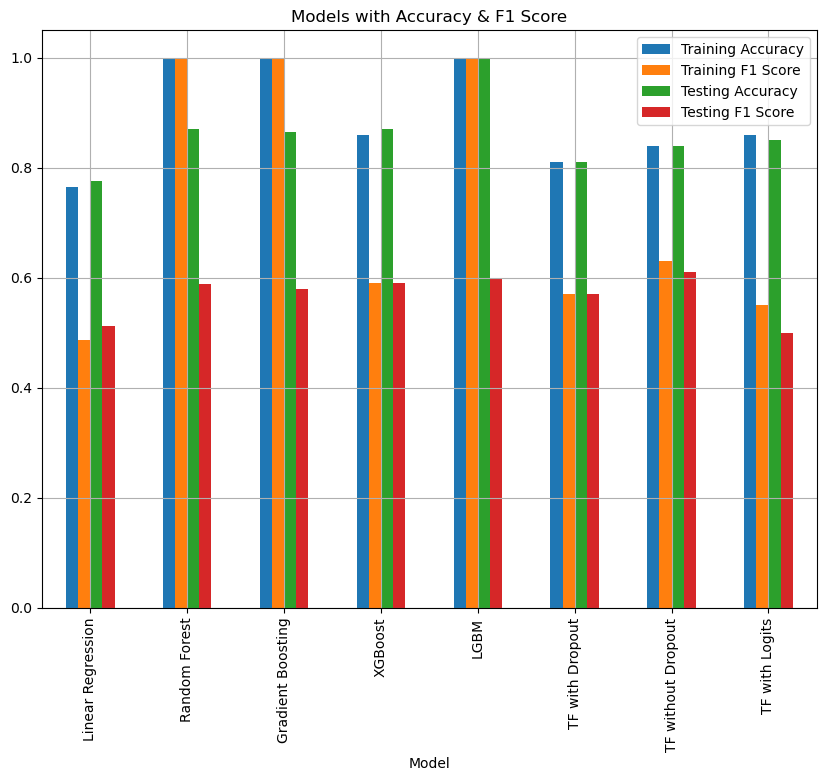

In [116]:
plt.rcParams["figure.figsize"] = [10.00, 7.50]
data.plot(kind='bar')
plt.title('Models with Accuracy & F1 Score')
plt.xlabel('Model')
plt.grid()